In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_excel("C:/Users/brand/Desktop/DSTI/Python for ML/Project 3/cleaned_sleep_data.xlsx")

In [3]:
# Display the first few rows of the dataset
print(data.head())

                     Species         Genus        Order   Vore Conservation  \
0           African elephant     Loxodonta  Proboscidea  herbi           vu   
1  African giant pouched rat    Cricetomys     Rodentia   omni          NaN   
2      African striped mouse     Rhabdomys     Rodentia   omni          NaN   
3                 Arctic fox        Vulpes    Carnivora  carni          NaN   
4     Arctic ground squirrel  Spermophilus     Rodentia  herbi           lc   

     BodyWt  BrainWt  TotalSleep  Awake  NonDreaming  Dreaming  LifeSpan  \
0  6654.000   5712.0         3.3   20.7          NaN       NaN      38.6   
1     1.000      6.6         8.3   15.7          6.3       2.0       4.5   
2     0.044      0.0         8.7   15.3          NaN       NaN       NaN   
3     3.380     44.5        12.5   11.5          NaN       NaN      14.0   
4     0.920      5.7        16.6    7.4          NaN       NaN       NaN   

   Gestation  Predation  Exposure  Danger  
0      645.0        3.0 

In [4]:
# Get a summary of the dataset
print(data.describe())

            BodyWt      BrainWt  TotalSleep      Awake  NonDreaming  \
count    86.000000    86.000000   86.000000  86.000000    47.000000   
mean    163.260047   198.689070   10.558140  13.443023     8.736170   
std     773.155873   797.995293    4.467516   4.469209     3.679522   
min       0.005000     0.000000    1.900000   4.100000     2.100000   
25%       0.206250     0.035000    8.075000  10.350000     6.300000   
50%       2.250000     5.600000   10.300000  13.700000     8.400000   
75%      46.582500    67.000000   13.650000  15.925000    11.000000   
max    6654.000000  5712.000000   19.900000  22.100000    17.900000   

        Dreaming    LifeSpan   Gestation  Predation   Exposure     Danger  
count  63.000000   54.000000   54.000000  58.000000  58.000000  58.000000  
mean    1.979365   20.240741  139.268519   2.844828   2.362069   2.586207  
std     1.474204   18.757011  144.696322   1.496214   1.575005   1.426989  
min     0.100000    2.000000   12.000000   1.000000   1.

In [5]:
# Check for missing values / candidates to remove
print(data.isnull().sum())

Species          0
Genus            0
Order            0
Vore             0
Conservation    28
BodyWt           0
BrainWt          0
TotalSleep       0
Awake            0
NonDreaming     39
Dreaming        23
LifeSpan        32
Gestation       32
Predation       28
Exposure        28
Danger          28
dtype: int64


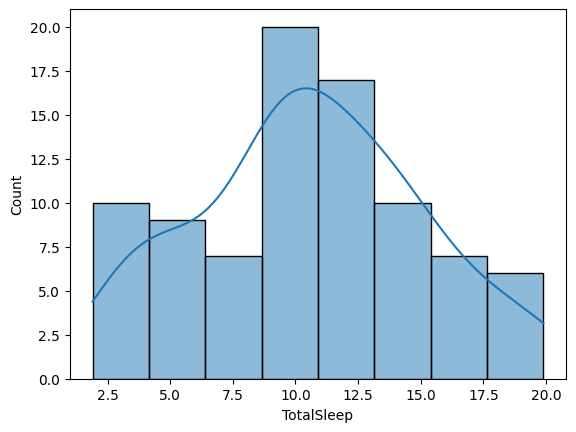

In [13]:
# Histograms for continuous variables
sns.histplot(data['TotalSleep'], kde=True)
plt.show()

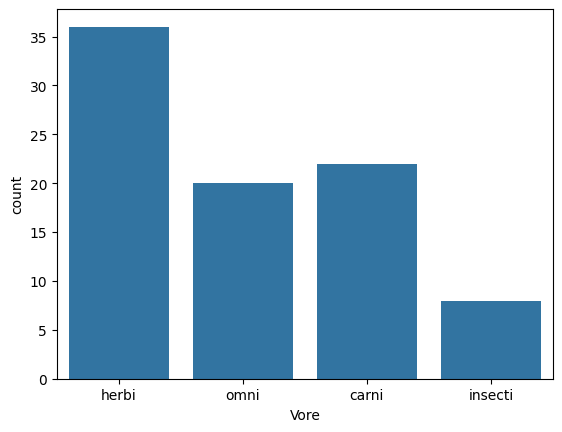

In [8]:
# Box plots / count plots for categorical variables
sns.countplot(x='Vore', data=data)
plt.show()

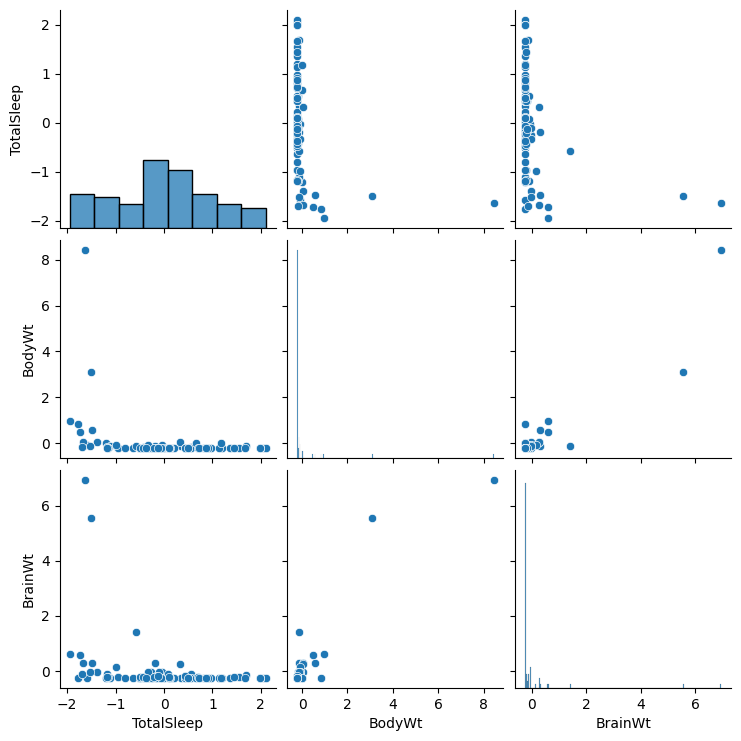

In [9]:
from sklearn.preprocessing import StandardScaler

# Selecting the relevant columns
columns_to_normalize = ['TotalSleep', 'BodyWt', 'BrainWt']
data_to_normalize = data[columns_to_normalize]

# Normalizing the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data_to_normalize)
normalized_df = pd.DataFrame(normalized_data, columns=columns_to_normalize)

# Using pairplot on the normalized data
sns.pairplot(normalized_df)
plt.show()

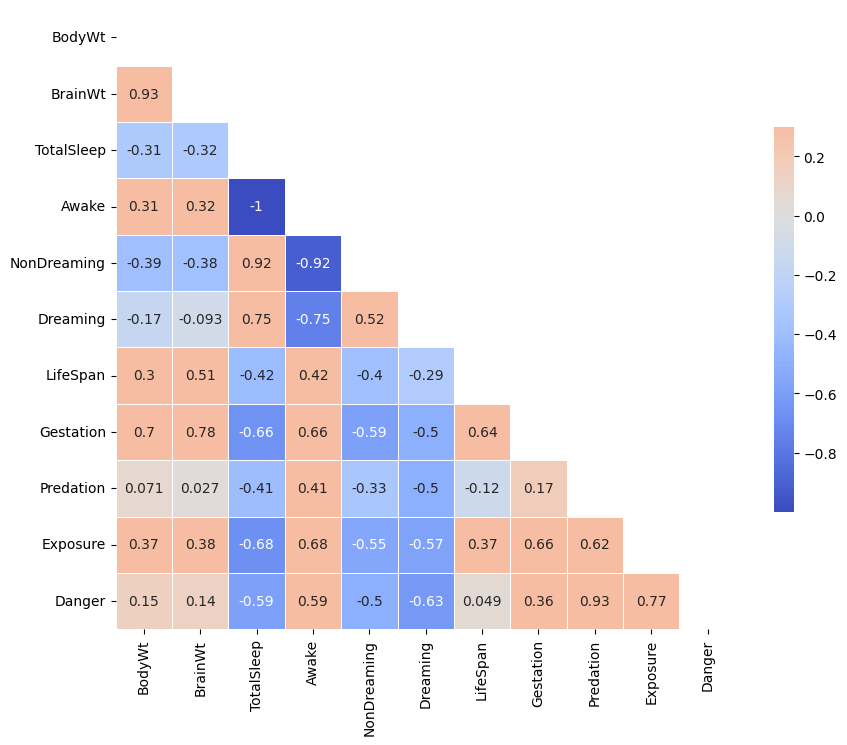

In [10]:
# Filtering only numerical columns for correlation matrix
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Setting up the matplotlib figure
plt.figure(figsize=(10, 10))

# Generating a mask for the upper triangle (optional)
mask = np.triu(np.ones_like(numerical_data.corr(), dtype=bool))

# Drawing the heatmap with the mask and correct aspect ratio
sns.heatmap(numerical_data.corr(), annot=True, mask=mask, cmap='coolwarm', 
            vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Displaying the plot
plt.show()

In [11]:
# Log transform data
data['LogBodyWt'] = np.log(data['BodyWt'] + 1)
data['LogBrainWt'] = np.log(data['BrainWt'] + 1)

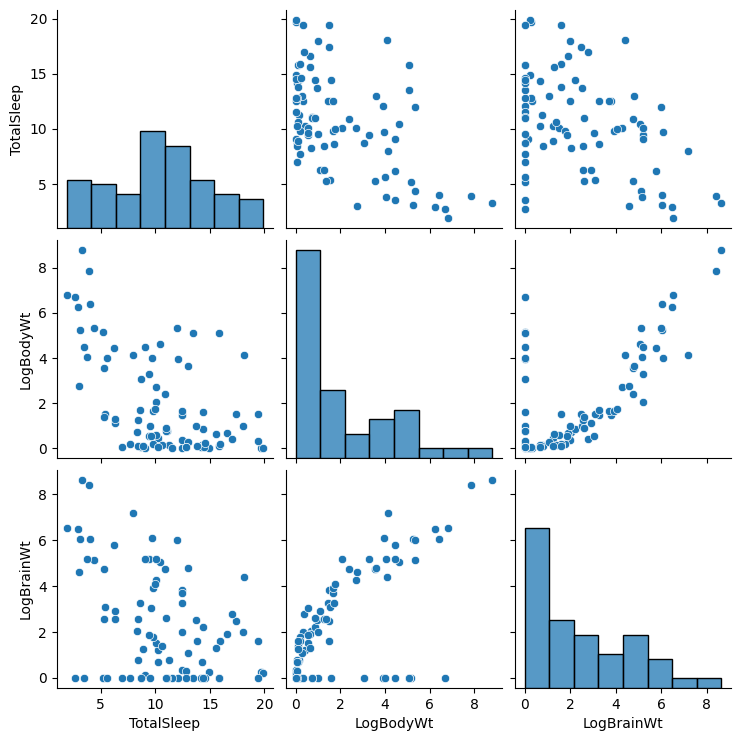

In [12]:
# Pairplot to visualise relationships after log transformation
sns.pairplot(data[['TotalSleep', 'LogBodyWt', 'LogBrainWt']])
plt.show()